In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [17]:
# Set water year
# water_year = 21
water_year = input('Enter the water year(ie. "19" for 2019): ')
if water_year == '00':
    start_year = '99'
elif 0 < int(water_year) <= 10:
    start_year = '0' + str(int(water_year) - 1)
else:
    start_year = str(int(water_year) - 1)
print(start_year)

full_year = '20' + water_year
print(full_year)

22
2023


In [18]:
salmon = xr.open_dataset(f'/Users/clintonalden/Documents/Research/summa_work/model/output/salmon_meadows/output_salmon_WY{water_year}_timestep.nc')
salmon2K = xr.open_dataset(f'/Users/clintonalden/Documents/Research/summa_work/model/output/salmon_meadows/output_salmon_+2K_WY{water_year}_timestep.nc')

# load values csv as df
df = pd.read_csv('salmon_plot_vals.csv', index_col='Year')  # Assuming 'Year' is the column with years


depth = salmon.isel(hru=0)['iLayerHeight']
temp = salmon.isel(hru=0)['mLayerTemp']
frac_wat = salmon.isel(hru=0)['mLayerVolFracWat']

depth = -depth

# df.drop(df.tail(1).index, inplace=True)

In [19]:
depth = salmon.isel(hru=0)['iLayerHeight']
temp = salmon.isel(hru=0)['mLayerTemp']
frac_wat = salmon.isel(hru=0)['mLayerVolFracWat']

depth = -depth
bins = np.arange(0, depth.ifcToto.max() + 11, 10)/100  # Define your bins
thick = depth.values
results = []


for i in range(thick.shape[1]):
    dif_matrix = np.subtract.outer(thick[:,i], bins)
    idx = np.abs(dif_matrix).argmin(axis=1)
    results.append(bins[idx])
    
new_da = xr.DataArray(results[:-1], dims=['midToto', 'time'], name='layer_bins')
merged_ds = xr.merge([new_da,frac_wat])

slice_ds = merged_ds.sel(time=slice(f'20{start_year}-11-01', f'20{water_year}-06-01'))

binned_times = []
for time in slice_ds.time:
    temp_ds = slice_ds.sel(time=time).groupby_bins(group='layer_bins', bins=bins).mean()
    temp_ds = temp_ds.assign_coords(time=time)
    binned_times.append(temp_ds)

con_da = xr.concat(binned_times, dim='time').mLayerVolFracWat

con_da = con_da.where(con_da != -9999, np.nan)
con_da = con_da.where(con_da != 9999, np.nan)*1000

In [20]:
den_0_10 = []
den_10_20 = []
den_20_30 = []

for i in con_da.time:
    array = con_da.sel(time=i).values
    array = array[~np.isnan(array)]
    array[array < 0] = np.nan

    if len(array) == 0:
        den_0_10.append(np.nan)
        den_10_20.append(np.nan)
        den_20_30.append(np.nan)

    if len(array) == 1:
        den_0_10.append(array[-1])
        den_10_20.append(np.nan)
        den_20_30.append(np.nan)

    if len(array) == 2:
        den_0_10.append(array[-1])
        den_10_20.append(array[-2])
        den_20_30.append(np.nan)

    if len(array) >= 3:
        den_0_10.append(array[-1])
        den_10_20.append(array[-2])
        den_20_30.append(array[-3])


## Do the same as above but for the run with +2K for salmon meadows

In [21]:
depth = salmon2K.isel(hru=0)['iLayerHeight']
temp = salmon2K.isel(hru=0)['mLayerTemp']
frac_wat = salmon2K.isel(hru=0)['mLayerVolFracWat']

depth = -depth
bins = np.arange(0, depth.ifcToto.max() + 10, 10)/100  # Define your bins
thick = depth.values
results = []


for i in range(thick.shape[1]):
    dif_matrix = np.subtract.outer(thick[:,i], bins)
    idx = np.abs(dif_matrix).argmin(axis=1)
    results.append(bins[idx])
    
new_da = xr.DataArray(results[:-1], dims=['midToto', 'time'], name='layer_bins')
merged_ds = xr.merge([new_da,frac_wat])

slice_ds = merged_ds.sel(time=slice(f'20{start_year}-11-01', f'20{water_year}-06-01'))

binned_times = []
for time in slice_ds.time:
    temp_ds = slice_ds.sel(time=time).groupby_bins(group='layer_bins', bins=bins).mean()
    temp_ds = temp_ds.assign_coords(time=time)
    binned_times.append(temp_ds)

con_da = xr.concat(binned_times, dim='time').mLayerVolFracWat

con_da = con_da.where(con_da != -9999, np.nan)
con_da = con_da.where(con_da != 9999, np.nan)*1000

In [22]:
warm_den_0_10 = []
warm_den_10_20 = []
warm_den_20_30 = []

for i in con_da.time:
    array = con_da.sel(time=i).values
    array = array[~np.isnan(array)]
    array[array < 0] = np.nan

    if len(array) == 0:
        warm_den_0_10.append(np.nan)
        warm_den_10_20.append(np.nan)
        warm_den_20_30.append(np.nan)

    if len(array) == 1:
        warm_den_0_10.append(array[-1])
        warm_den_10_20.append(np.nan)
        warm_den_20_30.append(np.nan)

    if len(array) == 2:
        warm_den_0_10.append(array[-1])
        warm_den_10_20.append(array[-2])
        warm_den_20_30.append(np.nan)

    if len(array) >= 3:
        warm_den_0_10.append(array[-1])
        warm_den_10_20.append(array[-2])
        warm_den_20_30.append(array[-3])

In [23]:
dif_0_10 = np.array(warm_den_0_10) - np.array(den_0_10)
dif_10_20 = np.array(warm_den_10_20) - np.array(den_10_20)
dif_20_30 = np.array(warm_den_20_30) - np.array(den_20_30)

## Plot differences for combined top 30cm

In [24]:
stack_den_30 = np.vstack((den_0_10, den_10_20, den_20_30))
warm_stack_den_30 = np.vstack((warm_den_0_10, warm_den_10_20, warm_den_20_30))

# Compute the mean along the vertical axis, ignoring NaNs
den_0_30 = np.nanmean(stack_den_30, axis=0)
warm_den_0_30 = np.nanmean(warm_stack_den_30, axis=0)

/var/folders/db/7c91t8d577n1zsyhth1xc7840000gn/T/ipykernel_1037/1944790864.py:5: RuntimeWarning: Mean of empty slice
  den_0_30 = np.nanmean(stack_den_30, axis=0)
/var/folders/db/7c91t8d577n1zsyhth1xc7840000gn/T/ipykernel_1037/1944790864.py:6: RuntimeWarning: Mean of empty slice
  warm_den_0_30 = np.nanmean(warm_stack_den_30, axis=0)


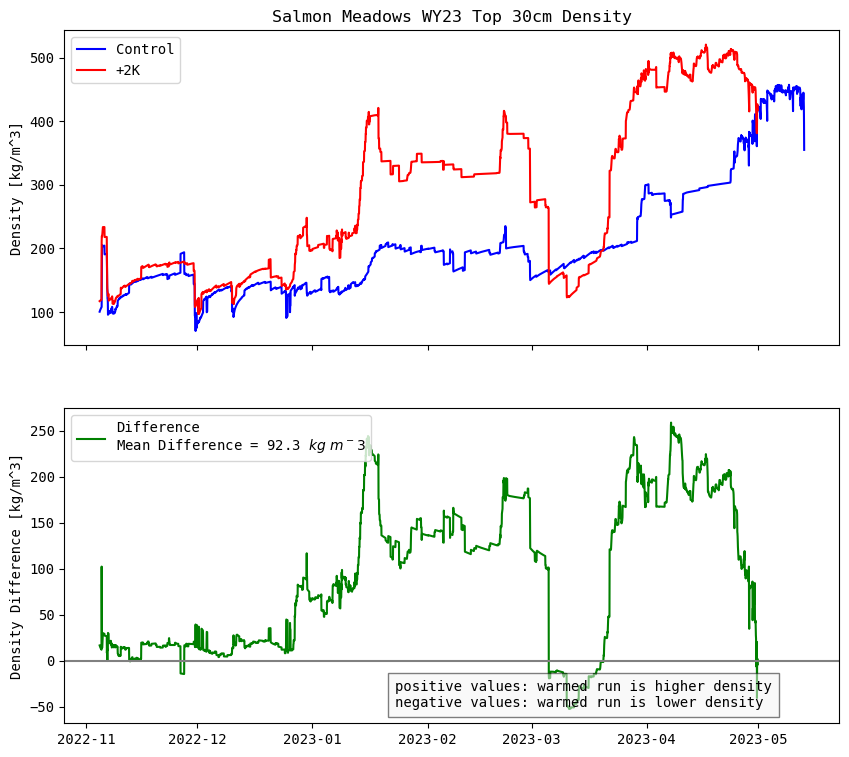

In [31]:
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(2, 1, figsize=(10, 9), sharex=True)

ax[0].plot(con_da.time, den_0_30, label='Control', color='blue')
ax[0].plot(con_da.time, warm_den_0_30, label='+2K', color='red')
ax[0].set_ylabel('Density [kg/m^3]')
ax[0].set_title(f'Salmon Meadows WY{water_year} Top 30cm Density')
ax[0].legend()


dif_0_30 = warm_den_0_30 - den_0_30
avg_dif = np.round(np.nanmean(dif_0_30), 1)
ax[1].plot(con_da.time, dif_0_30, label=f'Difference\nMean Difference = {avg_dif} $kg~m^{-3}$', color='green')
ax[1].axhline(0, color='gray')
ax[1].set_ylabel('Density Difference [kg/m^3]')
ax[1].text(con_da.time[2000], -50, 
        'positive values: warmed run is higher density\nnegative values: warmed run is lower density', 
        color='black', bbox={'facecolor': 'whitesmoke', 'alpha': 0.5, 'pad': 5})
ax[1].legend( loc='upper left')

plt.savefig(f'/Users/clintonalden/Documents/Research/summa_work/analysis/salmon_meadows/plots/density_dif_salmon_WY{water_year}.png', dpi=300)
# plt.close()

df.loc[full_year, 'top_den_change'] = avg_dif

## Plot the time spent in the danger zone

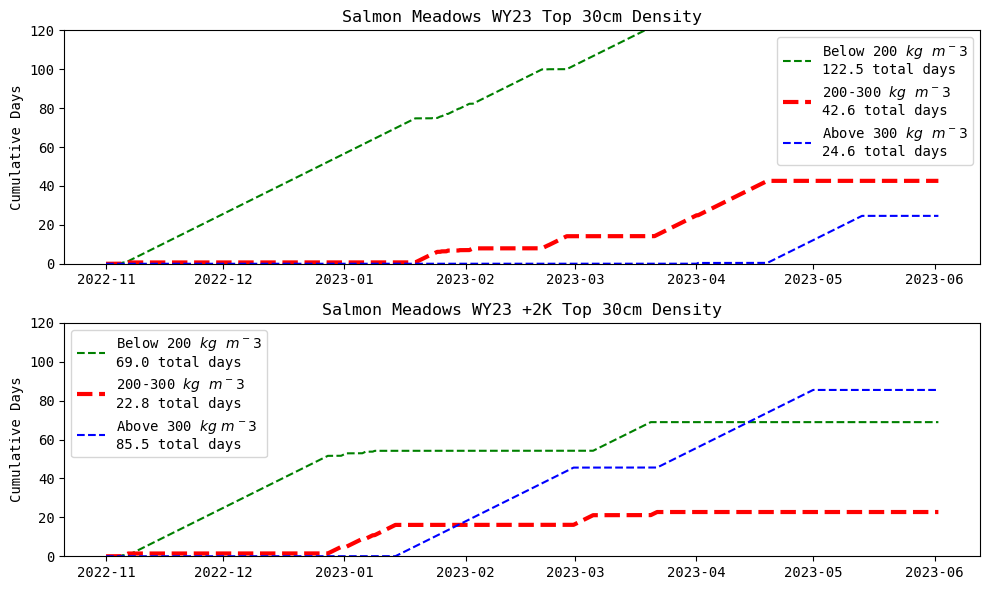

In [26]:
# Create masks for the conditions for den_0_30
mask_below_200 = den_0_30 < 200
mask_between_200_300 = (den_0_30 >= 200) & (den_0_30 <= 300)
mask_above_300 = den_0_30 > 300

# Compute the cumulative sums of the number of True values in the masks for den_0_30
cumsum_below_200 = np.cumsum(mask_below_200)/24
count_b200 = np.round(cumsum_below_200[-1], 1)
cumsum_between_200_300 = np.cumsum(mask_between_200_300)/24
count_200_300 = np.round(cumsum_between_200_300[-1], 1)
cumsum_above_300 = np.cumsum(mask_above_300)/24
count_a300 = np.round(cumsum_above_300[-1], 1)

# Create masks for the conditions for warm_den_0_30
warm_mask_below_200 = warm_den_0_30 < 200
warm_mask_between_200_300 = (warm_den_0_30 >= 200) & (warm_den_0_30 <= 300)
warm_mask_above_300 = warm_den_0_30 > 300

# Compute the cumulative sums of the number of True values in the masks for warm_den_0_30
warm_cumsum_below_200 = np.cumsum(warm_mask_below_200)/24
warm_count_b200 = np.round(warm_cumsum_below_200[-1], 1)
warm_cumsum_between_200_300 = np.cumsum(warm_mask_between_200_300)/24
warm_count_200_300 = np.round(warm_cumsum_between_200_300[-1], 1)
warm_cumsum_above_300 = np.cumsum(warm_mask_above_300)/24
warm_count_a300 = np.round(warm_cumsum_above_300[-1], 1)

# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot the cumulative sums for den_0_30
axs[0].plot(con_da.time, cumsum_below_200, 
            label=f'Below 200 $kg \\ \\ m^{-3}$\n{count_b200} total days',  color='green', ls='--')
axs[0].plot(con_da.time, cumsum_between_200_300, 
            label=f'200-300 $kg \\ \\ m^{-3}$\n{count_200_300} total days', color='red', ls='--', lw=3)
axs[0].plot(con_da.time, cumsum_above_300, 
            label=f'Above 300 $kg \\ \\ m^{-3}$\n{count_a300} total days', color='blue', ls='--')
axs[0].set_ylim(0,120)
axs[0].legend()
axs[0].set_title(f'Salmon Meadows WY{water_year} Top 30cm Density')
axs[0].set_ylabel('Cumulative Days')

# Plot the cumulative sums for warm_den_0_30
axs[1].plot(con_da.time, warm_cumsum_below_200, 
            label=f'Below 200 $kg \\ \\ m^{-3}$\n{warm_count_b200} total days', color='green', ls='--')
axs[1].plot(con_da.time, warm_cumsum_between_200_300, 
            label=f'200-300 $kg \\ \\ m^{-3}$\n{warm_count_200_300} total days', color='red', ls='--', lw=3)
axs[1].plot(con_da.time, warm_cumsum_above_300, 
            label=f'Above 300 $kg~m^{-3}$\n{warm_count_a300} total days', color='blue', ls='--')
axs[1].legend()
axs[1].set_ylim(0,120)
axs[1].set_title(f'Salmon Meadows WY{water_year} +2K Top 30cm Density')
axs[1].set_ylabel('Cumulative Days')

plt.tight_layout()
plt.savefig(f'/Users/clintonalden/Documents/Research/summa_work/analysis/salmon_meadows/plots/dangerdays_salmon_WY{water_year}.png', dpi=300)

# plt.show()
# plt.close()

In [27]:
# append csv with important values
df.loc[full_year, 'control_DZ_days'] = count_200_300
df.loc[full_year, 'warm_DZ_days'] = warm_count_200_300
df.loc[full_year, 'control_snow_on_days'] = count_b200 + count_200_300 + count_a300
df.loc[full_year, 'warm_snow_on_days'] = warm_count_b200 + warm_count_200_300 + warm_count_a300
df.loc[full_year, 'DZday_change'] = warm_count_200_300 - count_200_300
df.loc[full_year, 'control_mean_den'] = np.nanmean(den_0_30)
df.loc[full_year, 'warm_mean_den'] = np.nanmean(warm_den_0_30)

## Histogram of top 30cm densities

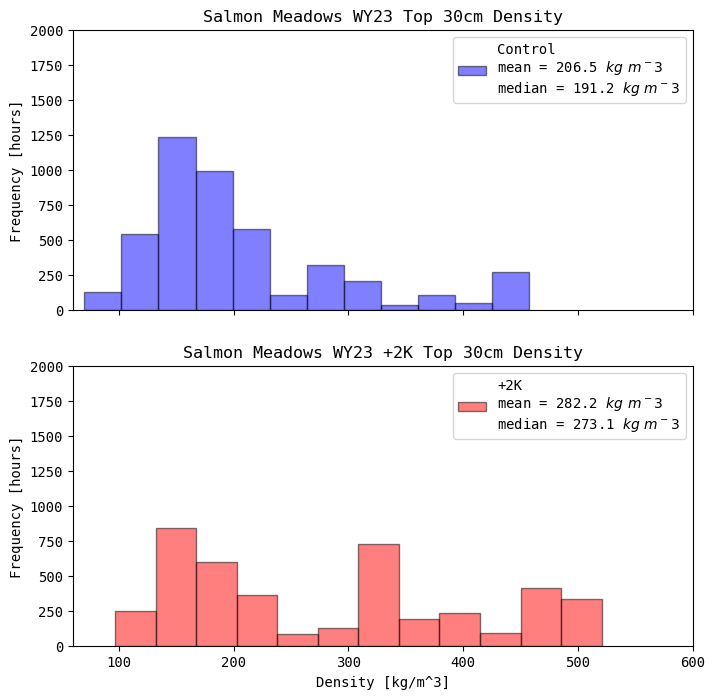

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

control_mean = np.round(np.nanmean(den_0_30), 1)
control_median = np.round(np.nanmedian(den_0_30), 1)
ax[0].hist(den_0_30, bins=12, color='blue', alpha=0.5, ec='black', 
           label=f'Control\nmean = {control_mean} $kg~m^{-3}$\nmedian = {control_median} $kg~m^{-3}$')
ax[0].set_title(f'Salmon Meadows WY{water_year} Top 30cm Density')
ax[0].set_xlim(60, 600)
ax[0].set_ylim(0,2000)
ax[0].set_ylabel('Frequency [hours]')
ax[0].legend()

warm_mean = np.round(np.nanmean(warm_den_0_30), 1)
warm_median = np.round(np.nanmedian(warm_den_0_30), 1)
ax[1].hist(warm_den_0_30, bins=12, color='red', alpha=0.5, ec='black', 
           label=f'+2K\nmean = {warm_mean} $kg~m^{-3}$\nmedian = {warm_median} $kg~m^{-3}$')
ax[1].set_title(f'Salmon Meadows WY{water_year} +2K Top 30cm Density')
ax[1].set_xlim(60, 600)
ax[1].set_ylim(0,2000)
ax[1].set_xlabel('Density [kg/m^3]')
ax[1].set_ylabel('Frequency [hours]')
ax[1].legend()

# plt.savefig(f'/Users/clintonalden/Documents/Research/summa_work/analysis/salmon_meadows/plots/density_hist_salmon_WY{water_year}.png', dpi=300)
# plt.close()

In [29]:
df.to_csv('salmon_plot_vals.csv')

In [30]:
df

,Unnamed: 0,control_snow_on_days,control_DZ_days,warm_snow_on_days,warm_DZ_days,DZday_change,top_den_change,control_mean_den,warm_mean_den
Year,,,,,,,,,
2001.0,NaN,191.4,82.9,175.9,92.2,9.3,59.3,231.574700,284.140461
2002.0,NaN,213.0,22.2,177.9,13.1,-9.1,27.8,223.547933,231.739068
2003.0,NaN,205.4,60.1,201.7,62.8,2.7,49.6,222.159397,267.980905
2004.0,NaN,189.4,19.2,161.0,25.0,5.8,51.8,199.431465,234.821584
2005.0,NaN,191.4,56.9,176.3,67.7,10.8,58.9,240.253534,282.361600
2006.0,NaN,197.5,44.3,177.1,85.4,41.1,43.0,220.429859,243.138472
2007.0,NaN,171.6,7.1,148.7,28.8,21.7,35.7,223.591707,223.080551
2008.0,NaN,180.1,40.3,153.7,22.5,-17.8,52.1,238.235929,280.992385
2009.0,NaN,174.3,93.2,118.6,63.4,-29.8,39.9,250.548013,261.531968
